In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-09-08 12:41:12--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-09-08 12:41:13--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   172MB/s    in 

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Pawn', 'Knight', 'Bishop', 'Rook', 'King', 'Queen']

In [4]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


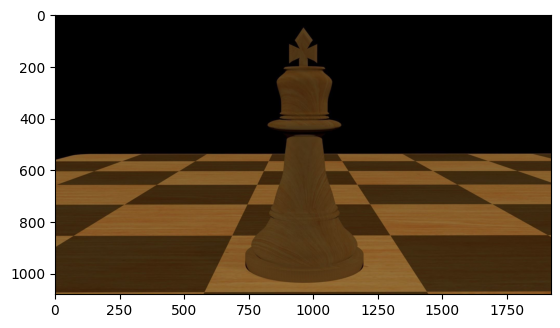

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

Found 499 images belonging to 6 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 52 images belonging to 6 classes.


In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [10]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
hist = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50,
    verbose = 1
)

Epoch 1/50
63/63 [==============================] - 28s 422ms/step - loss: 1.8241 - accuracy: 0.1784 - val_loss: 1.7889 - val_accuracy: 0.1923
Epoch 2/50
63/63 [==============================] - 25s 394ms/step - loss: 1.7886 - accuracy: 0.1764 - val_loss: 1.7840 - val_accuracy: 0.2115
Epoch 3/50
63/63 [==============================] - 25s 389ms/step - loss: 1.7863 - accuracy: 0.1864 - val_loss: 1.7817 - val_accuracy: 0.1923
Epoch 4/50
63/63 [==============================] - 24s 373ms/step - loss: 1.7943 - accuracy: 0.1884 - val_loss: 1.7835 - val_accuracy: 0.1923
Epoch 5/50
63/63 [==============================] - 24s 372ms/step - loss: 1.7799 - accuracy: 0.1984 - val_loss: 1.7505 - val_accuracy: 0.2885
Epoch 6/50
63/63 [==============================] - 23s 371ms/step - loss: 1.7625 - accuracy: 0.2104 - val_loss: 1.7595 - val_accuracy: 0.1923
Epoch 7/50
63/63 [==============================] - 24s 375ms/step - loss: 1.7587 - accuracy: 0.2645 - val_loss: 1.6998 - val_accuracy: 0.2885

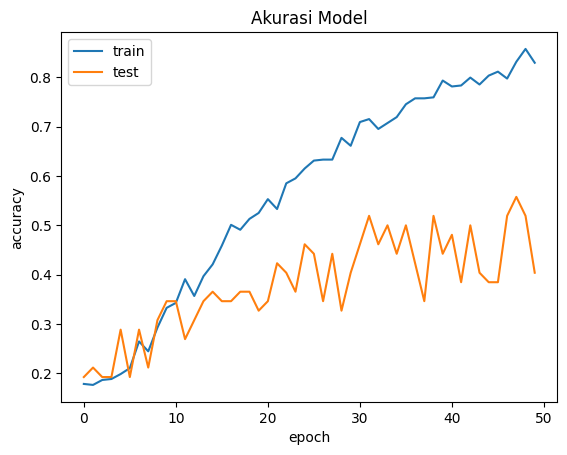

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

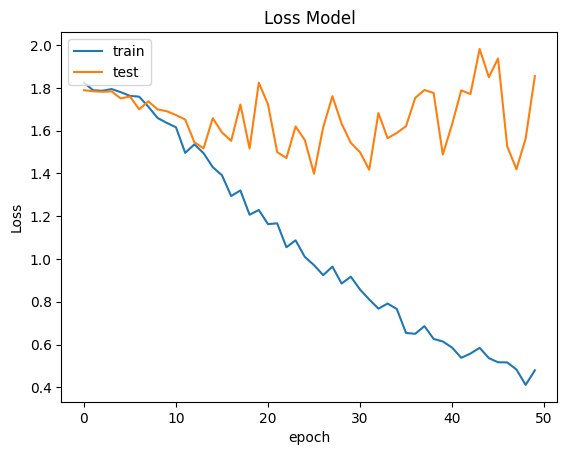

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()